# Explore here

In [3]:
import sys
print("Python ejecutándose desde:")
print(sys.executable)

Python ejecutándose desde:
c:\Users\claup\AppData\Local\Programs\Python\Python312\python.exe


In [4]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv')

In [5]:
df.duplicated().sum()

np.int64(630)

In [5]:
df.drop_duplicates(inplace=True)

In [7]:
df.reset_index()

,index,url,is_spam
0,0,https://briefingday.us8.list-manage.com/unsubs...,True
1,1,https://www.hvper.com/,True
2,2,https://briefingday.com/m/v4n3i4f3,True
3,3,https://briefingday.com/n/20200618/m#commentform,False
4,4,https://briefingday.com/fan,True
...,...,...,...
2364,2993,https://www.theverge.com/2020/6/29/21306889/di...,False
2365,2994,https://www.smartcitiesworld.net/news/news/dee...,False
2366,2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2367,2997,https://www.technologyreview.com/2019/12/20/13...,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2369 non-null   object
 1   is_spam  2369 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 39.3+ KB


In [9]:
print(len(df[df['is_spam']==True]))
print(len(df[df['is_spam']==False]))

244
2125


In [12]:
import regex as re

def preprocesar_texto(text):
    #Eliminar cualquier caracter que no sea una letra (a-z) o un espacio en blanco
    text = re.sub(r'[^a-z ]'," ",text)
    # Eliminar espacios en blanco
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)
    # Reducir espacios en blanco múltiples a uno único
    text = re.sub(r'\s+', " ", text.lower())
    # Eliminar tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)
    return text.split()

In [13]:
df['url'] = df['url'].apply(preprocesar_texto)

In [14]:
df.head()

,url,is_spam
0,"[https, briefingday, us, list, manage, com, un...",True
1,"[https, www, hvper, com]",True
2,"[https, briefingday, com, v, i]",True
3,"[https, briefingday, com, m, commentform]",False
4,"[https, briefingday, com, fan]",True


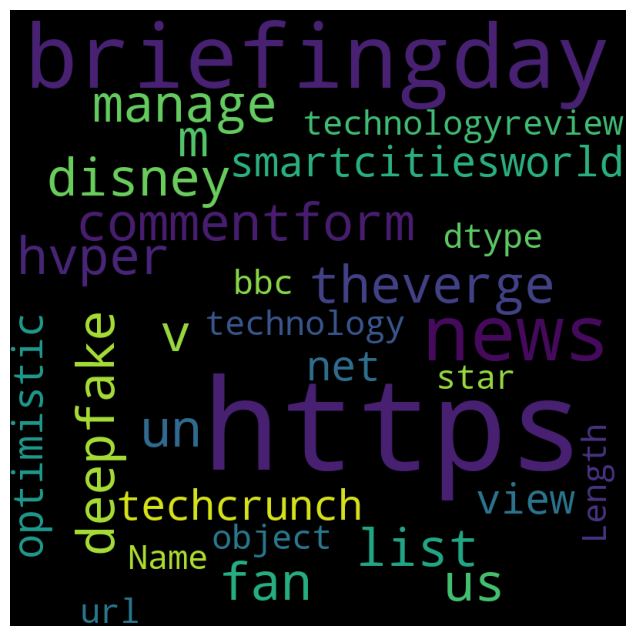

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(df["url"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [18]:
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
download("wordnet")
lemmatizer = WordNetLemmatizer()

download("stopwords")
stop_words = stopwords.words("english")
stop_words.append('http')

def lemmatize_text(words, lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

df["url"] = df["url"].apply(lemmatize_text)
df.head()

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,url,is_spam
0,"[briefingday, list, manage, unsubscribe]",True
1,[hvper],True
2,[briefingday],True
3,"[briefingday, commentform]",False
4,[briefingday],True


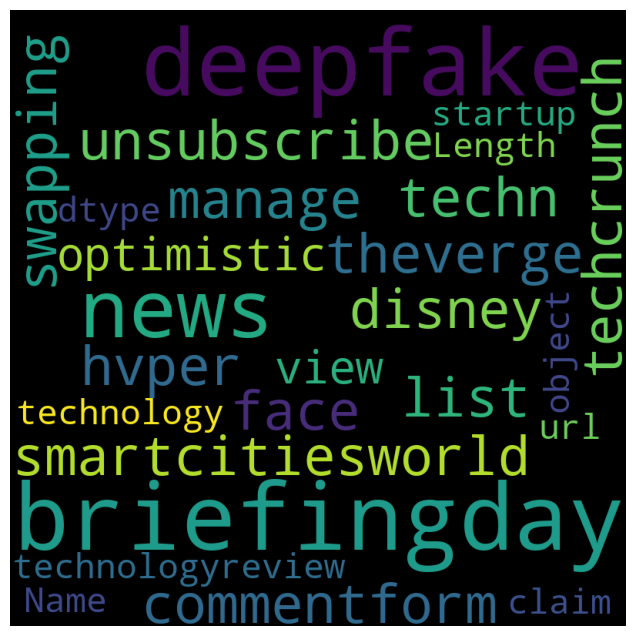

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(df["url"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizador = TfidfVectorizer(max_features=5000,max_df=0.8,min_df = 5)
X = df.url
y = df.is_spam

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8, random_state=42)

token_lista = ["".join(tokens) for tokens in X_train]
token_lista2 = ["".join(tokens) for tokens in X_test]




In [22]:
X_train_vec = vectorizador.fit_transform(token_lista).toarray()
X_test_vec = vectorizador.transform(token_lista2).toarray()

In [23]:
X_train_vec

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1895, 8))

In [24]:
from sklearn.svm import SVC

model = SVC(random_state = 42)
model.fit(X_train_vec, y_train)

SVC(random_state=42)

In [25]:
y_pred = model.predict(X_test_vec)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9177215189873418

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']} 

In [28]:
grid = GridSearchCV(model,param_grid,refit=True,verbose=10)

grid.fit(X_train_vec,y_train)

print(grid.best_params_)
print(grid.best_estimator_)

best_model = grid.best_estimator_

accuracy_score(y_test,best_model.predict(X_test_vec))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 1/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 2/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 2/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 3/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 3/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 4/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 4/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 5/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 5/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 1/5; 2/50] START C=0.1, gamma=1, kernel=linear..............................
[CV 1/5; 2/50] END C=0.1, gamma=1, kernel=linea

0.9177215189873418

In [29]:
from pickle import dump

dump(best_model,open('../models/svm_rbf_C_0.1_gamme_1_42.sav','wb'))

Gracias!